####  Pre-requisites

In [1]:
import warnings 
warnings.filterwarnings(action="ignore")

#### Import required packages

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from langdetect import detect

#### Paths

In [3]:
RAW_TRAIN_PATH = '../../Data/Raw/english_train.csv.csv'
RAW_TEST_PATH  = '../../Data/Raw/english_test.csv.csv'
PROCESSED_TRAIN_PATH = '../../Data/Processed/english_train_cleaned.csv'
PROCESSED_TEST_PATH  = '../../Data/Processed/english_test_cleaned.csv'

#### Load the data

In [4]:
train_df = pd.read_csv(RAW_TRAIN_PATH)
test_df  = pd.read_csv(RAW_TEST_PATH)
print(f"Train shape: {train_df.shape}, Test shape: {test_df.shape}")

Train shape: (28342, 4), Test shape: (2895, 4)


In [5]:
train_df.head()

,id,Heading,Summary,Article
0,english_2023_train_0,"Barbie Review: Greta Gerwig, Margot Robbie, Ry...",Barbie Movie Review: Ryan Gosling shines the b...,Barbie Movie Review: One mention of Barbie and...
1,english_2023_train_1,Gadar 2: Sunny Deol-Ameesha Patel Starrer's Tr...,A source close to the film told News18 exclusi...,"The highly anticipated Gadar 2, starring Sunny..."
2,english_2023_train_2,Kartik Aaryan Ditches First Class To Fly In Ec...,Kartik Aaryan was spotted flying in economy cl...,"Kartik Aaryan, who is gearing up for the relea..."
3,english_2023_train_3,"India's Anju, Now Fatima, Receives Land, Money...",Abbasi had said that it was important to make ...,"Indian woman, Anju who travelled to Pakistan t..."
4,english_2023_train_4,Himachal Pradesh Hotels Offer 50% Discount As ...,Flash floods and landslides caused by heavy do...,"Himachal Pradesh, one of the worst hit states ..."


In [6]:
test_df.head()

,id,Heading,Summary,Article
0,EnglishNews_test_0,"After Durga Puja, West Bengal Govt Eyes UNESCO...","Notably, last year, Kolkata's Durga Puja festi...",Chief Minister Mamata Banerjee-led West Bengal...
1,EnglishNews_test_1,Is Your Xiaomi Mi A3 Bricked Because of The Fa...,Xiaomi has confirmed that all bricked Mi A3 ph...,If you are a Xiaomi Mi A3 user whose unit has ...
2,EnglishNews_test_2,Har Ghar Tiranga Movement: Right Time for Indi...,It is Prime Minister Narendra Modi's unique wa...,Har Ghar Tiranga is Prime Minister Narendra M...
3,EnglishNews_test_3,Hero MotoCorp Plans to Expand its Electric Two...,Besides targeting leadership in the electric t...,VidaHero MotoCorp is gearing up to expand its ...
4,EnglishNews_test_4,Delhi HC Permits St Stephen's College to Hold ...,Delhi HC has permitted DU's St Stephen's Colle...,The Delhi High Court has permitted St Stephen'...


#### EDA

In [7]:
# no of rows and col in the dataset
print("Train Data Shape:", train_df.shape)
print("Test Data Shape:", test_df.shape)

Train Data Shape: (28342, 4)
Test Data Shape: (2895, 4)


In [8]:
# get the general info about the dataset
print("\n--- Train Info ---")
train_df.info()


--- Train Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28342 entries, 0 to 28341
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       28342 non-null  object
 1   Heading  28342 non-null  object
 2   Summary  28342 non-null  object
 3   Article  28342 non-null  object
dtypes: object(4)
memory usage: 885.8+ KB


In [9]:
print("\n--- Test Info ---")
test_df.info()


--- Test Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2895 entries, 0 to 2894
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       2895 non-null   object
 1   Heading  2895 non-null   object
 2   Summary  2895 non-null   object
 3   Article  2895 non-null   object
dtypes: object(4)
memory usage: 90.6+ KB


#### Pre-processing

In [10]:
# Check nulls
print("\nMissing values in Train:\n", train_df.isnull().sum())
print("\nMissing values in Test:\n", test_df.isnull().sum())


Missing values in Train:
 id         0
Heading    0
Summary    0
Article    0
dtype: int64

Missing values in Test:
 id         0
Heading    0
Summary    0
Article    0
dtype: int64


In [11]:
# keep only required columns
train_df=train_df[['Article','Summary']]
test_df=test_df[['Article','Summary']]

In [12]:
# Remove exact duplicates
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)

print("Train shape after removing duplicates:", train_df.shape)
print("Test shape after removing duplicates:", test_df.shape)

Train shape after removing duplicates: (28332, 2)
Test shape after removing duplicates: (2895, 2)


In [13]:
#Whitespace & Empties
train_df['Article'] = train_df['Article'].astype(str).str.strip()
train_df['Summary'] = train_df['Summary'].astype(str).str.strip()
test_df['Article']  = test_df['Article'].astype(str).str.strip()
test_df['Summary']  = test_df['Summary'].astype(str).str.strip()

train_df = train_df[(train_df['Article'].str.len() > 0) & (train_df['Summary'].str.len() > 0)]
test_df  = test_df[(test_df['Article'].str.len() > 0) & (test_df['Summary'].str.len() > 0)]

In [14]:
#Length Filtering
train_df['Article_len'] = train_df['Article'].apply(lambda x: len(x.split()))
train_df['Summary_len'] = train_df['Summary'].apply(lambda x: len(x.split()))
test_df['Article_len']  = test_df['Article'].apply(lambda x: len(x.split()))
test_df['Summary_len']  = test_df['Summary'].apply(lambda x: len(x.split()))

MIN_ARTICLE_LEN = 10
MIN_SUMMARY_LEN = 5

train_df = train_df[(train_df['Article_len'] >= MIN_ARTICLE_LEN) & (train_df['Summary_len'] >= MIN_SUMMARY_LEN)].reset_index(drop=True)
test_df  = test_df[(test_df['Article_len']  >= MIN_ARTICLE_LEN) & (test_df['Summary_len']  >= MIN_SUMMARY_LEN)].reset_index(drop=True)

In [15]:
# Drop short rows: article < 10 words OR summary < 5 words
train_before = train_df.shape[0]
train_df = train_df[(train_df['Article_len'] >= 10) & (train_df['Summary_len'] >= 5)]
train_after = train_df.shape[0]
print(f"Dropped {train_before - train_after} short rows from train set")

test_before = test_df.shape[0]
test_df = test_df[(test_df['Article_len'] >= 10) & (test_df['Summary_len'] >= 5)]
test_after = test_df.shape[0]
print(f"Dropped {test_before - test_after} short rows from test set")

Dropped 0 short rows from train set
Dropped 0 short rows from test set


In [16]:
# Language Filtering
def safe_detect_lang(text):
    try:
        return detect(text)
    except:
        return "error"

print('Running language detection recommended for very noisy/public datasets)...')
train_df['Article_lang'] = train_df['Article'].apply(safe_detect_lang)
train_df['Summary_lang'] = train_df['Summary'].apply(safe_detect_lang)
test_df['Article_lang']  = test_df['Article'].apply(safe_detect_lang)
test_df['Summary_lang']  = test_df['Summary'].apply(safe_detect_lang)

train_df = train_df[(train_df['Article_lang'] == 'en') & (train_df['Summary_lang'] == 'en')].reset_index(drop=True)
test_df  = test_df[(test_df['Article_lang']  == 'en') & (test_df['Summary_lang']  == 'en')].reset_index(drop=True)


Running language detection recommended for very noisy/public datasets)...


In [17]:
# Drop language columns before saving
train_df = train_df[['Article', 'Summary']]
test_df  = test_df[['Article', 'Summary']]

#### Visualization

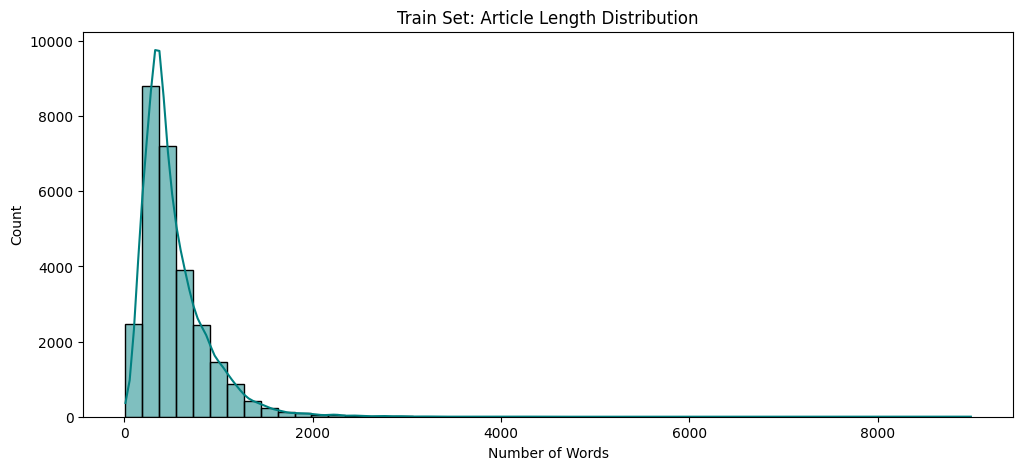

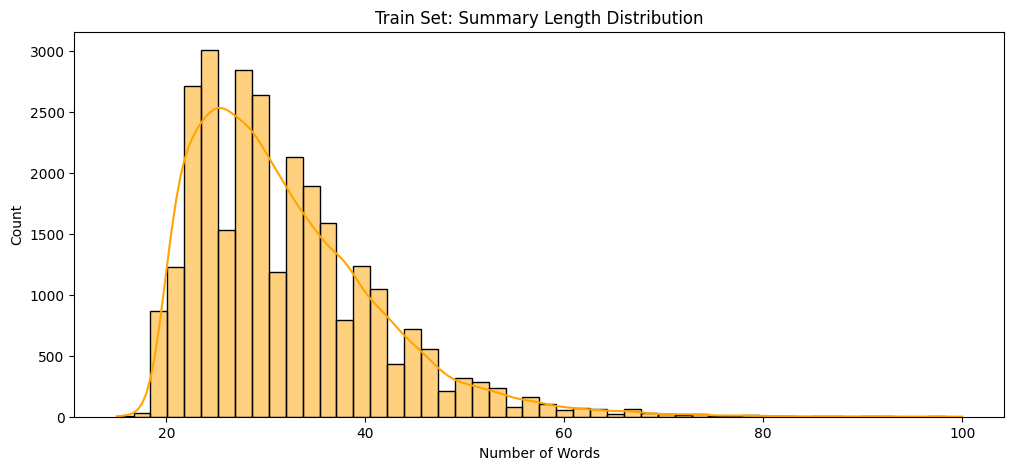

Mean Article Length: 527.0
Mean Summary Length: 32.0


In [18]:
plt.figure(figsize=(12,5))
sns.histplot(train_df['Article'].apply(lambda x: len(x.split())), kde=True, bins=50, color='teal')
plt.title('Train Set: Article Length Distribution')
plt.xlabel('Number of Words')
plt.show()

plt.figure(figsize=(12,5))
sns.histplot(train_df['Summary'].apply(lambda x: len(x.split())), kde=True, bins=50, color='orange')
plt.title('Train Set: Summary Length Distribution')
plt.xlabel('Number of Words')
plt.show()

print(f"Mean Article Length: {train_df['Article'].apply(lambda x: len(x.split())).mean():.1f}")
print(f"Mean Summary Length: {train_df['Summary'].apply(lambda x: len(x.split())).mean():.1f}")

In [19]:
# Save Processed Data
os.makedirs(os.path.dirname(PROCESSED_TRAIN_PATH), exist_ok=True)
train_df.to_csv(PROCESSED_TRAIN_PATH, index=False)
test_df.to_csv(PROCESSED_TEST_PATH, index=False)